In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input,decode_predictions




In [2]:
model = MobileNetV2(weights='imagenet')

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


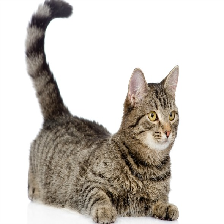

In [3]:
img_path ='/kaggle/input/multidomain-image-characteristics-dataset/Dataset/Animals/cats/cat1.jpg'

img = image.load_img(img_path,target_size=(224,224))
img

In [4]:
img = image.load_img(img_path,target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array,axis=0)
img_array = preprocess_input(img_array)
img_array

array([[[[0.9843137 , 0.9843137 , 0.9843137 ],
         [0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686],
         ...,
         [0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.99215686, 0.99215686, 0.99215686],
         [1.        , 1.        , 1.        ]

In [5]:
predications = model.predict(img_array)
decoded_predications = decode_predictions(predications,top=3)
decoded_predications

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02123045', 'tabby', 0.82983625),
  ('n02123159', 'tiger_cat', 0.03982982),
  ('n02124075', 'Egyptian_cat', 0.017394189)]]

In [11]:
decoded_predications[0]

[('n02123045', 'tabby', 0.82983625),
 ('n02123159', 'tiger_cat', 0.03982982),
 ('n02124075', 'Egyptian_cat', 0.017394189)]

In [12]:
for i, (img_id, label, predications) in enumerate(decoded_predications[0]):
    print(i,img_id,label,predications)

0 n02123045 tabby 0.82983625
1 n02123159 tiger_cat 0.03982982
2 n02124075 Egyptian_cat 0.017394189


In [15]:
def predict_image(img_path):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array,axis=0)
    img_array = preprocess_input(img_array)
    
    predications = model.predict(img_array)
    decoded_predications = decode_predictions(predications,top=5)[0]


    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    for i, (img_id, label, score) in enumerate(decoded_predications):
        print(f"{i+1}. {label}: {score*100 :.2f}% ")


    



    
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


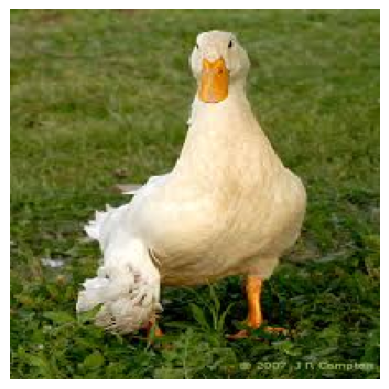

1. goose: 53.02% 
2. hen: 23.73% 
3. albatross: 6.66% 
4. cock: 1.63% 
5. pelican: 0.97% 


In [18]:

img_path = '/kaggle/input/multidomain-image-characteristics-dataset/Dataset/Birds/ducks/duck101.jpg'
predict_image(img_path)

In [19]:
model.save('image_classification.h5')